<a href="https://colab.research.google.com/github/Unserved-sleep/A-Comparative-Study-of-Machine-Learning-Models-and-Ensemble-Techniques-for-Fraud-Detection/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries and Dataset**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/Datasets.csv")

# **Summary and statistics of the dataset**

In [3]:
df.head()

,Column1,step,type,branch,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,unusuallogin,Acct type,Date of transaction,Time of day,isFraud
0,1,1,TRANSFER,India,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,2,Current,07-01-2018,Morning,1
1,2,1,CASH_OUT,Australia,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,Current,06-01-2018,Afternoon,1
2,3,1,DEBIT,Japon,9644.94,C1900366749,4465.0,0.0,C997608398,10845.0,157982.12,4,Savings,13-01-2018,Night,0
3,4,1,CASH_OUT,India,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,12,Savings,05-01-2018,Night,0
4,5,1,TRANSFER,India,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,14,Current,08-01-2018,Afternoon,0


In [4]:
df.tail()

,Column1,step,type,branch,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,unusuallogin,Acct type,Date of transaction,Time of day,isFraud
3222,3223,7,TRANSFER,Brasil,59660.29,C969639517,24593.00,0.00,C1410669831,167.00,252392.49,5,Current,06-01-2018,Morning,0
3223,3224,7,CASH_OUT,Venezuela,387388.92,C1020775060,666682.71,279293.79,C914293025,1239108.91,2755264.61,6,Current,12-01-2018,Afternoon,0
3224,3225,7,TRANSFER,Cuba,1315556.51,C1653980726,38960.20,0.00,C257999182,2324423.73,15000000.00,19,Savings,19-01-2018,Night,0
3225,3226,7,CASH_OUT,Republica Dominicana,3387.85,C1242647123,20869.68,17481.83,C451433836,16148.00,0.00,14,Savings,16-01-2018,Morning,0
3226,3227,7,CASH_OUT,El Salvador,34311.33,C429051494,8566.31,0.00,C578294406,272678.00,1909674.30,2,Savings,25-01-2018,Night,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3227 entries, 0 to 3226
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Column1              3227 non-null   int64  
 1   step                 3227 non-null   int64  
 2   type                 3227 non-null   object 
 3   branch               3227 non-null   object 
 4   amount               3227 non-null   float64
 5   nameOrig             3227 non-null   object 
 6   oldbalanceOrg        3227 non-null   float64
 7   newbalanceOrig       3227 non-null   float64
 8   nameDest             3227 non-null   object 
 9   oldbalanceDest       3227 non-null   float64
 10  newbalanceDest       3227 non-null   float64
 11  unusuallogin         3227 non-null   int64  
 12  Acct type            3227 non-null   object 
 13  Date of transaction  3227 non-null   object 
 14  Time of day          3226 non-null   object 
 15  isFraud              3227 non-null   i

In [6]:
df.describe()

,Column1,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,unusuallogin,isFraud
count,3227.000000,3227.000000,3.227000e+03,3.227000e+03,3.227000e+03,3.227000e+03,3.227000e+03,3227.000000,3227.000000
mean,1614.000000,4.074992,1.779945e+05,2.621712e+06,2.694896e+06,1.861107e+06,2.059916e+06,10.554695,0.021072
std,931.698986,2.482790,3.194541e+05,3.086039e+06,3.141360e+06,3.578104e+06,3.850152e+06,5.847862,0.143647
min,1.000000,1.000000,6.895000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,807.500000,1.000000,3.929288e+04,3.472524e+04,2.804700e+02,5.508838e+04,3.360280e+04,5.000000,0.000000
50%,1614.000000,4.000000,1.216191e+05,1.155863e+06,1.323332e+06,2.790271e+05,2.150800e+05,10.000000,0.000000
75%,2420.500000,7.000000,2.346310e+05,4.709960e+06,4.861616e+06,1.505569e+06,1.658746e+06,16.000000,0.000000
max,3227.000000,7.000000,1.000000e+07,1.290000e+07,1.300000e+07,1.950000e+07,1.920000e+07,20.000000,1.000000


In [7]:
df['isFraud'].value_counts()

,count
isFraud,
0,3159
1,68


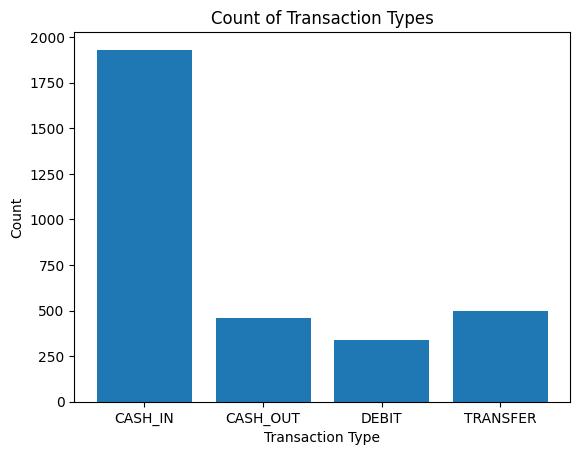

In [8]:
# Count the occurrences of each transaction type
type_counts = df['type'].value_counts()

# Extract counts for the desired types
desired_types = ['CASH_IN','CASH_OUT', 'DEBIT', 'TRANSFER']
counts = [type_counts.get(t, 0) for t in desired_types]

plt.bar(desired_types, counts)
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.title('Count of Transaction Types')
plt.show()

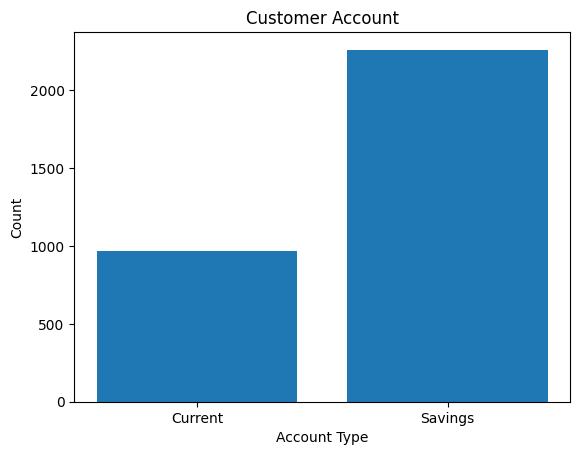

In [9]:
# Count the occurrences of each transaction type
type_counts = df['Acct type'].value_counts()

# Extract counts for the desired types
desired_types = ['Current','Savings']
counts = [type_counts.get(t, 0) for t in desired_types]

plt.bar(desired_types, counts)
plt.xlabel('Account Type')
plt.ylabel('Count')
plt.title('Customer Account')
plt.show()

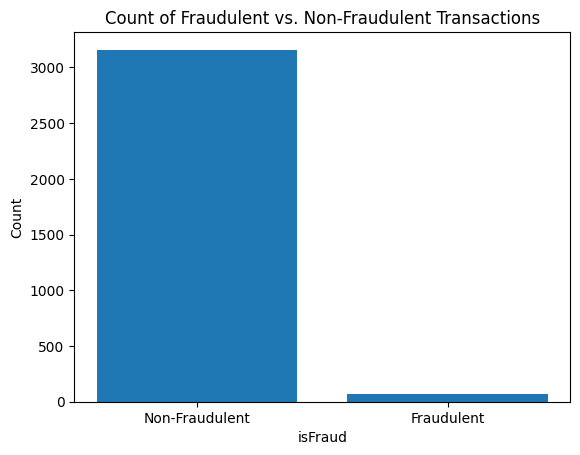

In [10]:
# Count the occurrences of fraud and non-fraud transactions
fraud_counts = df['isFraud'].value_counts()

plt.bar(fraud_counts.index, fraud_counts.values)
plt.xlabel('isFraud')
plt.ylabel('Count')
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.xticks([0, 1], ['Non-Fraudulent', 'Fraudulent'])
plt.show()


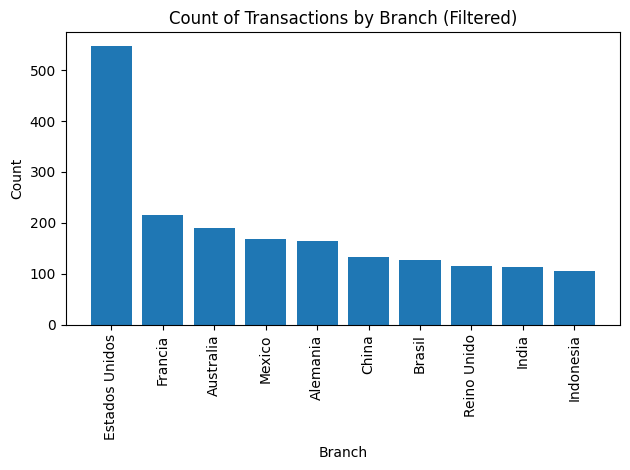

In [11]:
# Count the occurrences of each branch
branch_counts = df['branch'].value_counts()

# Filter branches with more than 100 transactions
filtered_branches = branch_counts[branch_counts > 100]

plt.bar(filtered_branches.index, filtered_branches.values)

plt.xlabel('Branch')
plt.ylabel('Count')
plt.title('Count of Transactions by Branch (Filtered)')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

# **Dataset Prepration - One Hot Coding**

In [12]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [13]:
label_encoder = LabelEncoder()

df['type'] = label_encoder.fit_transform(df['type'])
df['branch'] = label_encoder.fit_transform(df['branch'])
df['Acct type'] = label_encoder.fit_transform(df['Acct type'])
df['Time of day'] = label_encoder.fit_transform(df['Time of day'])

print(df[['type', 'branch', 'Acct type', 'Time of day']])

      type  branch  Acct type  Time of day
0        3      48          0            1
1        1       6          0            0
2        2      55          1            2
3        1      48          1            2
4        3      48          0            0
...    ...     ...        ...          ...
3222     3      15          0            1
3223     1     108          0            0
3224     3      28          1            2
3225     1      86          1            1
3226     1      32          1            2

[3227 rows x 4 columns]


In [14]:
df_encoded = pd.get_dummies(df, columns=['type', 'branch', 'Acct type', 'Time of day'])

print(df_encoded.head())

   Column1  step     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0        1     1     181.00  C1305486145          181.0             0.0   
1        2     1     181.00   C840083671          181.0             0.0   
2        3     1    9644.94  C1900366749         4465.0             0.0   
3        4     1  229133.94   C905080434        15325.0             0.0   
4        5     1  215310.30  C1670993182          705.0             0.0   

      nameDest  oldbalanceDest  newbalanceDest  unusuallogin  ... branch_108  \
0   C553264065             0.0            0.00             2  ...      False   
1    C38997010         21182.0            0.00             1  ...      False   
2   C997608398         10845.0       157982.12             4  ...      False   
3   C476402209          5083.0        51513.44            12  ...      False   
4  C1100439041         22425.0            0.00            14  ...      False   

   branch_109  branch_110  branch_111  Acct type_0  Acct type_1  \
0

# **Normalization of Values**

In [15]:
min_max_scaler = MinMaxScaler()

numerical_cols = ['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'amount']

df['amount'] = df['oldbalanceOrg'] - df['newbalanceOrig']

df[numerical_cols] = min_max_scaler.fit_transform(df[numerical_cols])

print(df[numerical_cols].head())

   oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest    amount
0       0.000014             0.0        0.000000        0.000000  0.093406
1       0.000014             0.0        0.001086        0.000000  0.093406
2       0.000346             0.0        0.000556        0.008228  0.093795
3       0.001188             0.0        0.000261        0.002683  0.094779
4       0.000055             0.0        0.001150        0.000000  0.093454


# **Stndadization and Prepration of Testing Dataset**

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [17]:
# Convert the 'Date of transaction' column to datetime format
df['Date of transaction'] = pd.to_datetime(df['Date of transaction'], format='%d-%m-%Y')

df['transaction_year'] = df['Date of transaction'].dt.year
df['transaction_month'] = df['Date of transaction'].dt.month
df['transaction_day'] = df['Date of transaction'].dt.day
df['transaction_day_of_week'] = df['Date of transaction'].dt.dayofweek

# Drop 'Date of transaction' column
df_cleaned = df.drop(['Date of transaction', 'nameOrig', 'nameDest'], axis=1)

# Separate features (X) and target (y)
X = df_cleaned.drop('isFraud', axis=1)
y = df_cleaned['isFraud']

# Split dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# **Bayesian Logistic Regression**

classify whether a transaction is fraudulent.

The liblinear solver works by optimizing the loss function.

Ridge regularization - avoide overfitting

In [18]:
# 1. Bayesian Logistic Regression
bayesian_log_reg = LogisticRegression(solver='liblinear', penalty='l2', random_state=42)
bayesian_log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred_log_reg = bayesian_log_reg.predict(X_test_scaled)

# **SVM**

Find the optimal hyperplane that separates the data into different classes

The RBF kernel (non-linear) maps data into higher-dimensional space so that a linear separation is possible in that space.

In [19]:
# 2. Support Vector Machine (SVM)
svm_clf = SVC(kernel='rbf', random_state=43)
svm_clf.fit(X_train_scaled, y_train)

# Predictions using SVM
y_pred_svm = svm_clf.predict(X_test_scaled)

# **Performance Evaluation**

In [20]:
# 1. Evaluate Bayesian Logistic Regression
print("Bayesian Logistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

Bayesian Logistic Regression Performance:
Accuracy: 0.9845201238390093
Confusion Matrix:
[[635   1]
 [  9   1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       636
           1       0.50      0.10      0.17        10

    accuracy                           0.98       646
   macro avg       0.74      0.55      0.58       646
weighted avg       0.98      0.98      0.98       646



In [21]:
# 2. Evaluate SVM
print("\nSupport Vector Machine (SVM) Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))


Support Vector Machine (SVM) Performance:
Accuracy: 0.9860681114551083
Confusion Matrix:
[[636   0]
 [  9   1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       636
           1       1.00      0.10      0.18        10

    accuracy                           0.99       646
   macro avg       0.99      0.55      0.59       646
weighted avg       0.99      0.99      0.98       646



# **Confusion Matrix Plot**

A confusion matrix is a summary of the prediction results on a classification problem. It shows the number of correct and incorrect predictions, broken down by each class. The matrix has the following structure:

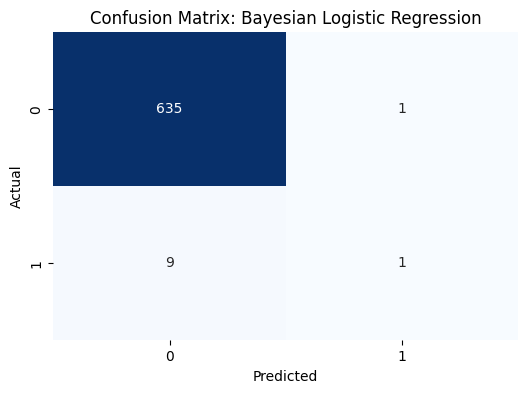

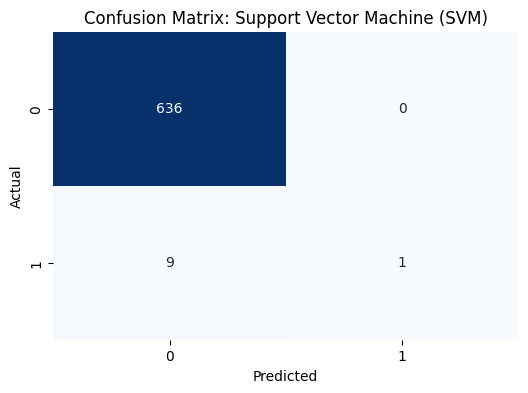

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix: {title}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Confusion matrix
plot_confusion_matrix(y_test, y_pred_log_reg, "Bayesian Logistic Regression")
plot_confusion_matrix(y_test, y_pred_svm, "Support Vector Machine (SVM)")

# **ROC Curve**



The AUC (Area Under the Curve) is a single scalar value that summarizes the overall performance of a classification model.

AUC = 1.0: Perfect classifier.

AUC = 0.5: Random classifier (same as random guessing).

AUC > 0.5: The model is better than random guessing.

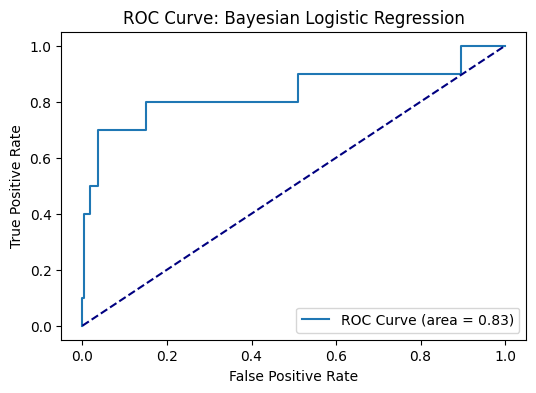

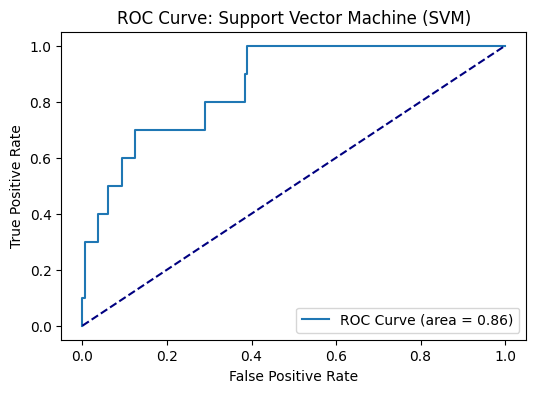

In [23]:
# Function to plot ROC curve
def plot_roc_curve(y_true, y_proba, title):
    fpr, tpr, thresholds = roc_curve(y_true, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f"ROC Curve (area = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve: {title}")
    plt.legend(loc="lower right")
    plt.show()

# Get probability scores for Logistic Regression and SVM
y_proba_log_reg = bayesian_log_reg.predict_proba(X_test_scaled)[:, 1]  # Probability for class 1
y_proba_svm = svm_clf.decision_function(X_test_scaled)  # Use decision_function for SVM

# Plot ROC Curve
plot_roc_curve(y_test, y_proba_log_reg, "Bayesian Logistic Regression")
plot_roc_curve(y_test, y_proba_svm, "Support Vector Machine (SVM)")


Kernel comparision

In [24]:
# Define models with different kernels
from sklearn.svm import SVC

# RBF Kernel (default)
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train_scaled, y_train)
y_pred_rbf = svm_rbf.predict(X_test_scaled)
print("RBF Kernel Accuracy:", accuracy_score(y_test, y_pred_rbf))

# Polynomial Kernel
svm_poly = SVC(kernel='poly', degree=6, random_state=42)
svm_poly.fit(X_train_scaled, y_train)
y_pred_poly = svm_poly.predict(X_test_scaled)
print("Polynomial Kernel Accuracy:", accuracy_score(y_test, y_pred_poly))


RBF Kernel Accuracy: 0.9860681114551083
Polynomial Kernel Accuracy: 0.9845201238390093


Random forest

Feature Importances: [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.63157895e-03 5.15995872e-05 5.15995872e-05 1.54798762e-04
 5.15995872e-05 4.12796698e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]


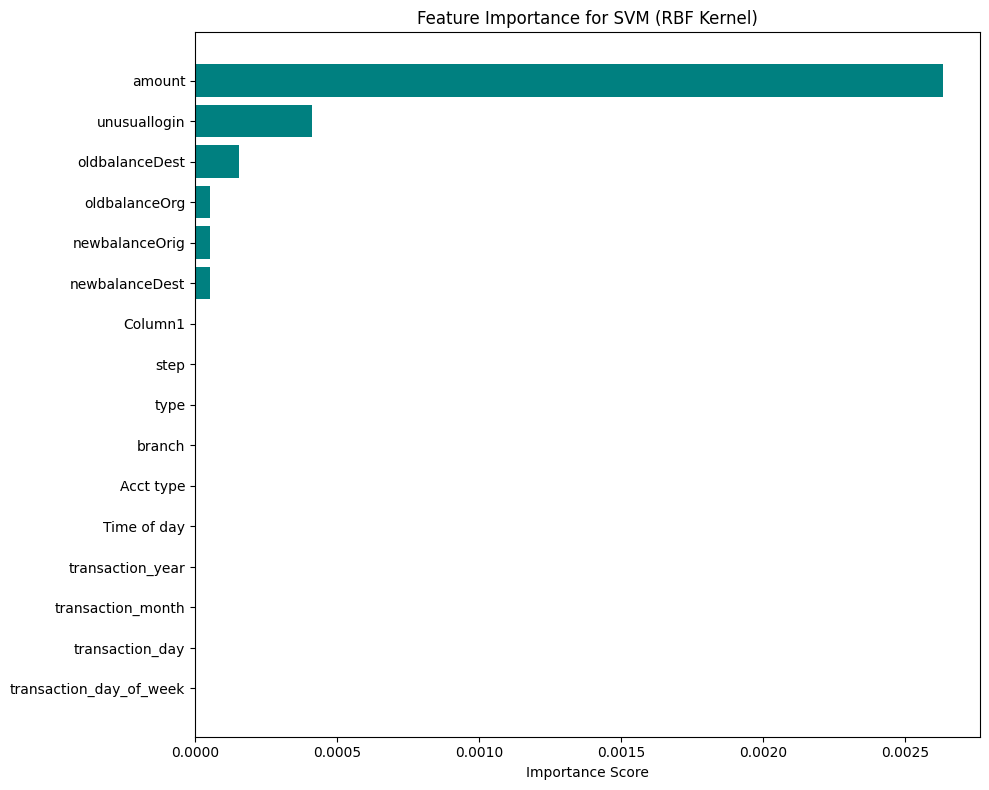

In [25]:
from sklearn.inspection import permutation_importance
from sklearn.datasets import load_iris  # For example purposes

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the RBF kernel SVM model
rbf_svc = SVC(kernel='rbf', random_state=42)
rbf_svc.fit(X_train_scaled, y_train)

# Calculate permutation importance
perm_importance = permutation_importance(rbf_svc, X_test_scaled, y_test, n_repeats=30, random_state=42)

# Print feature importances to check values
print("Feature Importances:", perm_importance.importances_mean)

# Organize the results into a DataFrame for easier plotting
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='teal')
plt.xlabel("Importance Score")
plt.title("Feature Importance for SVM (RBF Kernel)")
plt.gca().invert_yaxis()
plt.tight_layout()  # Ensure layout is adjusted
plt.show()

In [26]:
# Define which columns are important based on your criteria
# Replace these with the names of columns you consider important
important_columns = ['newbalanceDest', 'oldbalanceDest','amount', 'unusuallogin']  # Example for iris dataset

# Select only important columns for training
X_selected = X[important_columns]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the RBF kernel SVM model on the selected important columns
rbf_svc = SVC(kernel='rbf', random_state=42)
rbf_svc.fit(X_train_scaled, y_train)

# Make predictions and evaluate the model
y_pred = rbf_svc.predict(X_test_scaled)

# Output the classification report and accuracy
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       636
           1       1.00      0.10      0.18        10

    accuracy                           0.99       646
   macro avg       0.99      0.55      0.59       646
weighted avg       0.99      0.99      0.98       646

Accuracy: 0.9860681114551083


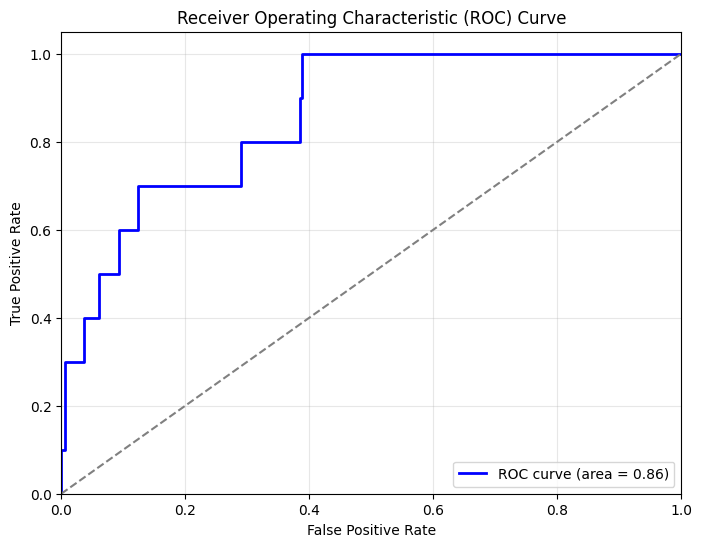

Best parameters found:  {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' is your DataFrame
# Define important columns
important_columns = ['newbalanceDest', 'oldbalanceDest','amount', 'unusuallogin' ]  # Replace with your important columns

# Separate target column
target_column = 'isFraud'
y = df[target_column]

# Select remaining numeric columns that are not in the list of important columns and not the target column
remaining_numeric_columns = [col for col in df.select_dtypes(include=[np.number]).columns
                             if col not in important_columns and col != target_column]

# Combine important columns and remaining numeric columns
selected_columns = important_columns + remaining_numeric_columns
X = df[selected_columns]

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define and train SVM model with probability estimation enabled
svm_clf = SVC(kernel='rbf', probability=True, random_state=45)  # Set probability=True for ROC curve
svm_clf.fit(X_train_scaled, y_train)

# Predict probabilities for the positive class
y_proba = svm_clf.predict_proba(X_test_scaled)[:, 1]  # Probability scores for class 1 (fraud)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Dashed diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()



param_grid = {
    'C': [0.1, 1, 10, 100],       # Regularization strength
    'gamma': [1, 0.1, 0.01, 0.001],  # Kernel coefficient
    'kernel': ['rbf']
}

# Perform grid search with cross-validation
grid = GridSearchCV(SVC(probability=True, random_state=42), param_grid, refit=True, scoring='roc_auc', cv=5)
grid.fit(X_train_scaled, y_train)

# Use the best model found
best_svm_clf = grid.best_estimator_

# Print the best parameters
print("Best parameters found: ", grid.best_params_)

Accuracy: 0.992260
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       636
           1       1.00      0.50      0.67        10

    accuracy                           0.99       646
   macro avg       1.00      0.75      0.83       646
weighted avg       0.99      0.99      0.99       646

Confusion Matrix:
[[636   0]
 [  5   5]]


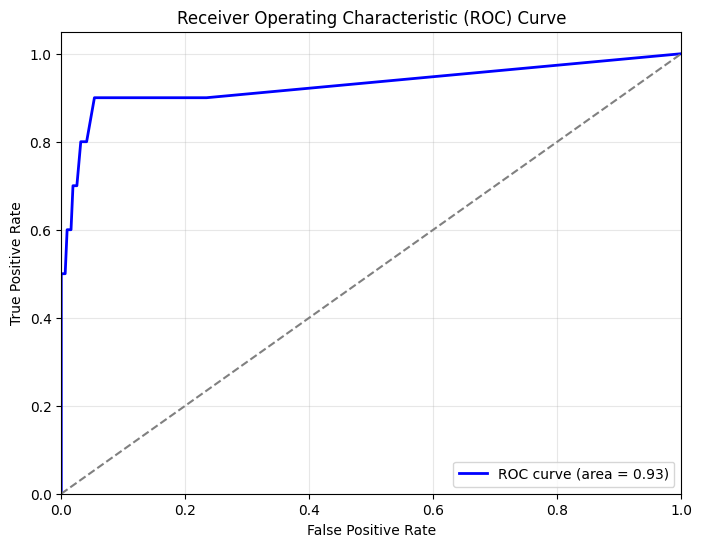

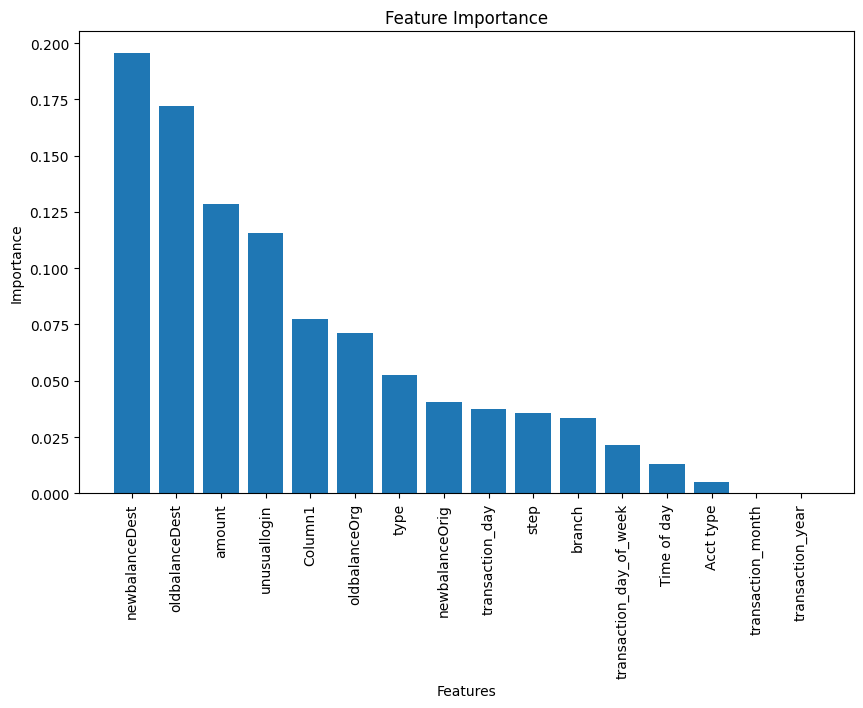

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Separate target column
target_column = 'isFraud'
y = df[target_column]

# Select only numeric columns, excluding the target column
X = df.select_dtypes(include=[np.number]).drop(target_column, axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define and train Random Forest model
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_clf.predict(X_test_scaled)

# Calculate and display accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.6f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Predict probabilities for the ROC curve
y_proba = rf_clf.predict_proba(X_test_scaled)[:, 1]  # Probability scores for class 1 (fraud)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

# Plot Feature Importance
importances = rf_clf.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


gradient boosting

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:27:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.992260
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       636
           1       1.00      0.50      0.67        10

    accuracy                           0.99       646
   macro avg       1.00      0.75      0.83       646
weighted avg       0.99      0.99      0.99       646

Confusion Matrix:
[[636   0]
 [  5   5]]


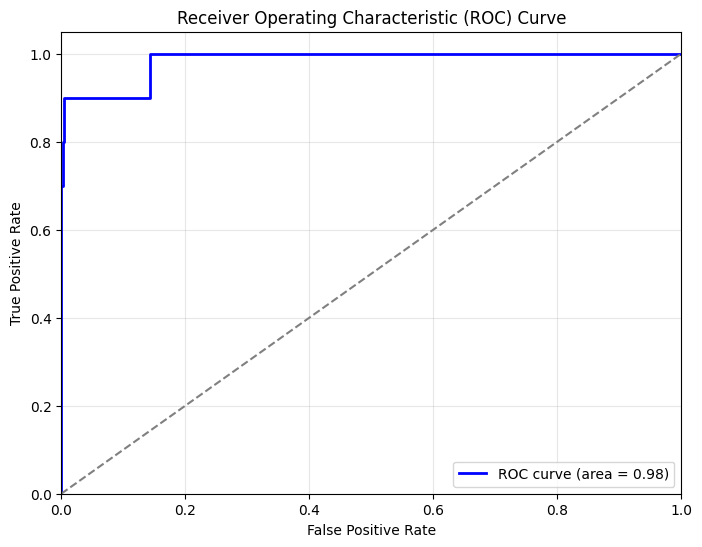

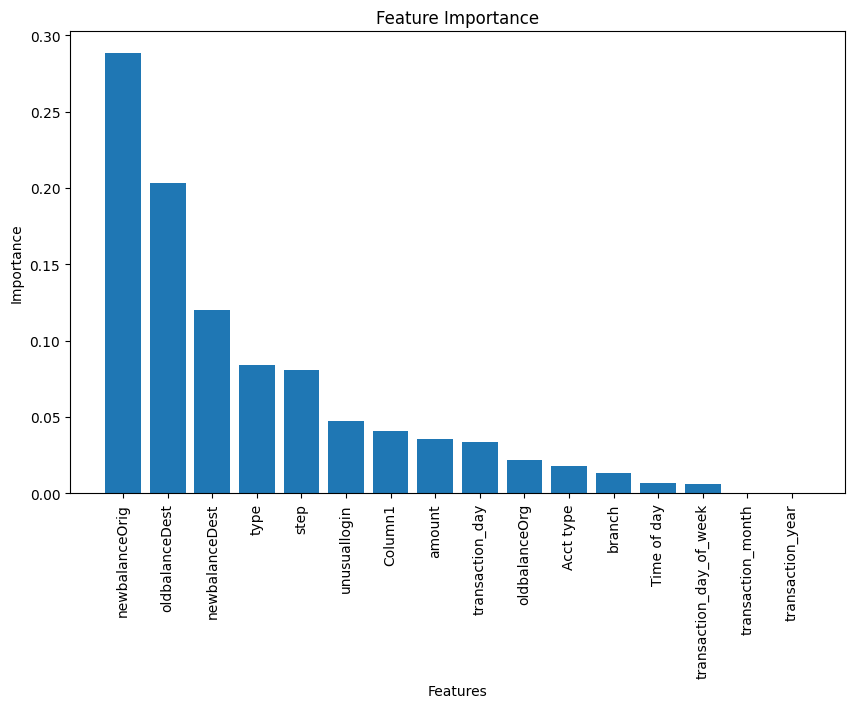

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Separate target column
target_column = 'isFraud'
y = df[target_column]

# Select only numeric columns, excluding the target column
X = df.select_dtypes(include=[np.number]).drop(target_column, axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define and train XGBoost model
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train_scaled, y_train)

# Make predictions
y_pred = xgb_clf.predict(X_test_scaled)

# Calculate and display accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.6f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Predict probabilities for the ROC curve
y_proba = xgb_clf.predict_proba(X_test_scaled)[:, 1]  # Probability scores for class 1 (fraud)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

# Plot Feature Importance
importances = xgb_clf.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

LightGBM


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Number of positive: 58, number of negative: 2523
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001615 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1678
[LightGBM] [Info] Number of data points in the train set: 2581, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.022472 -> initscore=-3.772761
[LightGBM] [Info] Start training from score -3.772761
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Accuracy: 0.99
Classification Report:
              precision    recall 

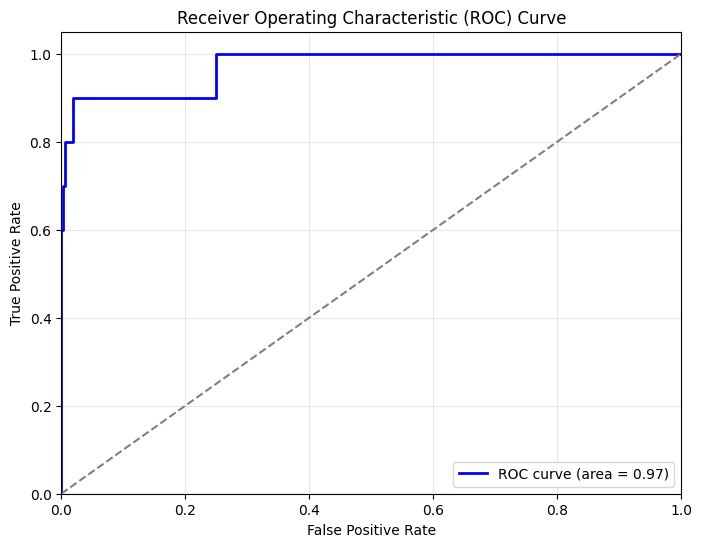

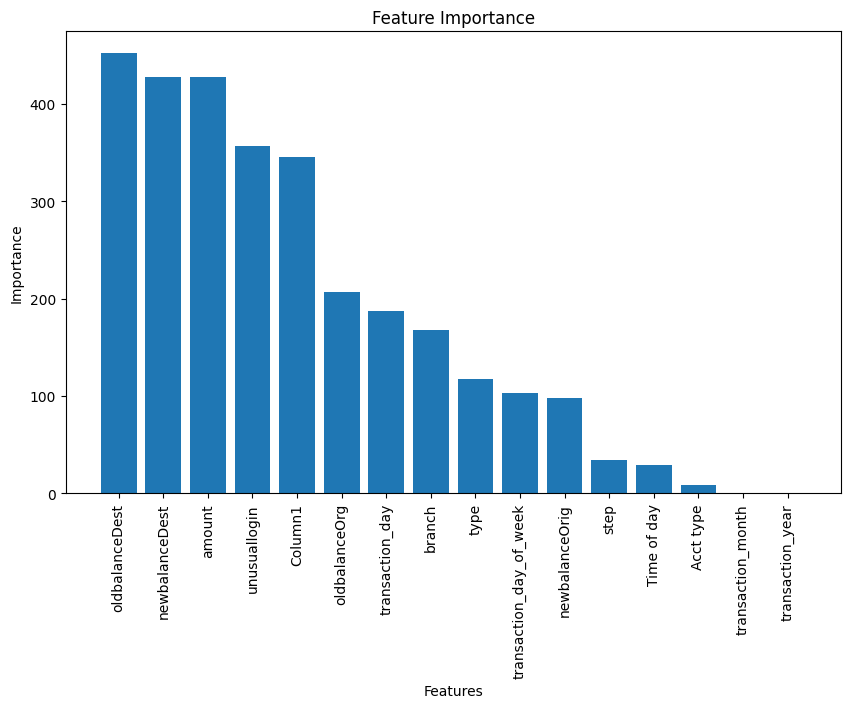

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Separate target column
target_column = 'isFraud'
y = df[target_column]

# Select only numeric columns, excluding the target column
X = df.select_dtypes(include=[np.number]).drop(target_column, axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define and train LightGBM model
lgbm_clf = LGBMClassifier(random_state=42)
lgbm_clf.fit(X_train_scaled, y_train)

# Make predictions
y_pred = lgbm_clf.predict(X_test_scaled)

# Calculate and display accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Predict probabilities for the ROC curve
y_proba = lgbm_clf.predict_proba(X_test_scaled)[:, 1]  # Probability scores for class 1 (fraud)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

# Plot Feature Importance
importances = lgbm_clf.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.3 MB/s eta 0:00:00
Accuracy: 0.993808
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       636
           1       1.00      0.60      0.75        10

    accuracy                           0.99       646
   macro avg       1.00      0.80      0.87       646
weighted avg       0.99      0.99      0.99       646

Confusion Matrix:
[[636   0]
 [  4   6]]


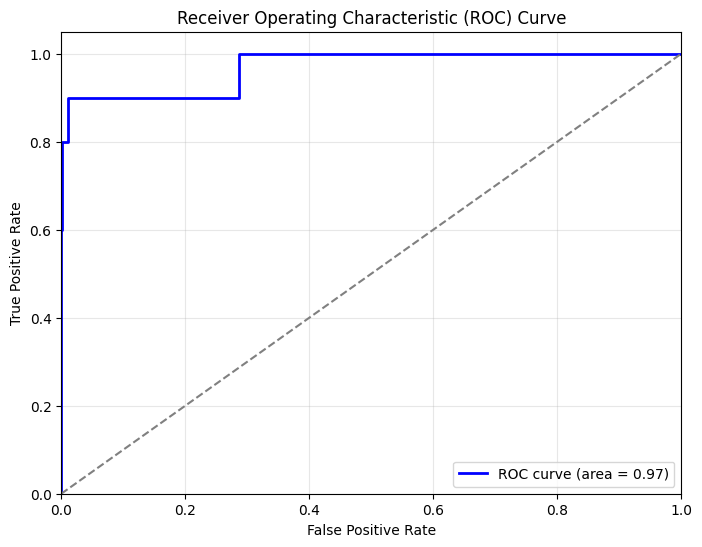

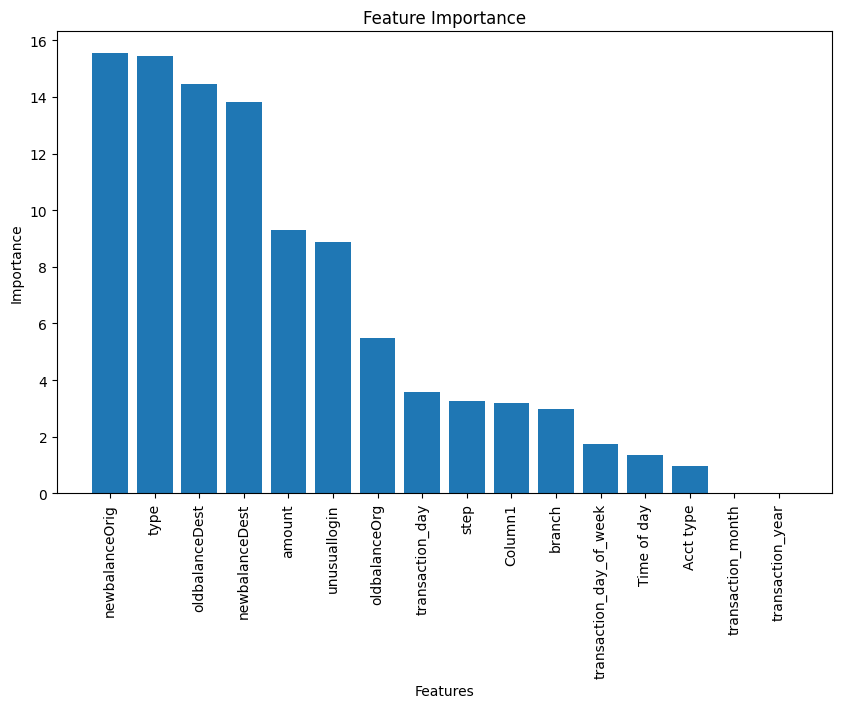

In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import accuracy_score, roc_curve, auc, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Separate target column
target_column = 'isFraud'
y = df[target_column]

# Select only numeric columns, excluding the target column
X = df.select_dtypes(include=[np.number]).drop(target_column, axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define and train CatBoost model
catboost_clf = CatBoostClassifier(random_state=42, verbose=0)  # verbose=0 to suppress training output
catboost_clf.fit(X_train_scaled, y_train)

# Make predictions
y_pred = catboost_clf.predict(X_test_scaled)

# Calculate and display accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.6f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Predict probabilities for the ROC curve
y_proba = catboost_clf.predict_proba(X_test_scaled)[:, 1]  # Probability scores for class 1 (fraud)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

# Plot Feature Importance
importances = catboost_clf.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:27:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 58, number of negative: 2523
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000252 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1678
[LightGBM] [Info] Number of data points in the train set: 2581, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.022472 -> initscore=-3.772761
[LightGBM] [Info] Start training from score -3.772761
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


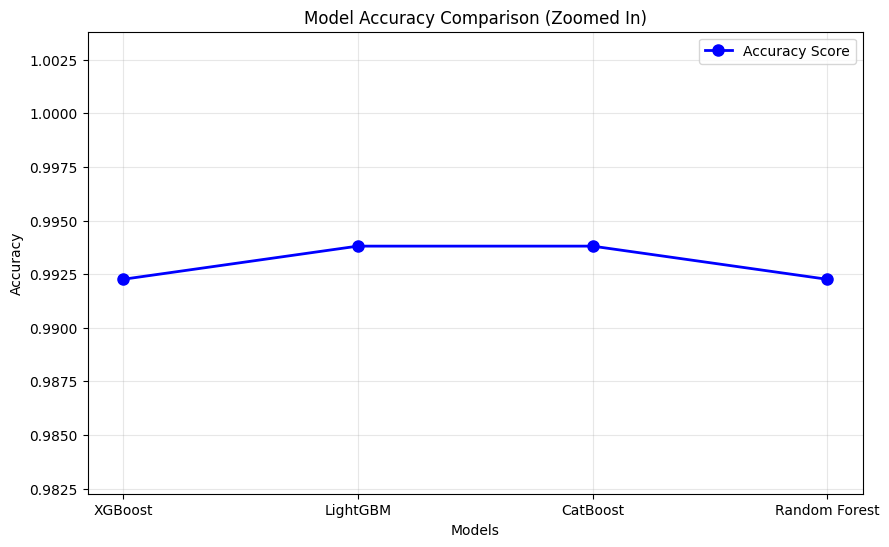

In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Separate target column
target_column = 'isFraud'
y = df[target_column]

# Select only numeric columns, excluding the target column
X = df.select_dtypes(include=[np.number]).drop(target_column, axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionary to store accuracy scores
accuracy_scores = {}

# Train and evaluate XGBoost
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train_scaled, y_train)
xgb_pred = xgb_clf.predict(X_test_scaled)
accuracy_scores['XGBoost'] = accuracy_score(y_test, xgb_pred)

# Train and evaluate LightGBM
lgbm_clf = LGBMClassifier(random_state=42)
lgbm_clf.fit(X_train_scaled, y_train)
lgbm_pred = lgbm_clf.predict(X_test_scaled)
accuracy_scores['LightGBM'] = accuracy_score(y_test, lgbm_pred)

# Train and evaluate CatBoost
catboost_clf = CatBoostClassifier(random_state=42, verbose=0)
catboost_clf.fit(X_train_scaled, y_train)
catboost_pred = catboost_clf.predict(X_test_scaled)
accuracy_scores['CatBoost'] = accuracy_score(y_test, catboost_pred)

# Train and evaluate Random Forest
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_scaled, y_train)
rf_pred = rf_clf.predict(X_test_scaled)
accuracy_scores['Random Forest'] = accuracy_score(y_test, rf_pred)

# Calculate the min and max accuracy for setting y-axis limits
min_accuracy = min(accuracy_scores.values())
max_accuracy = max(accuracy_scores.values())
margin = 0.01  # Adds a 1% margin for better visualization

# Plot the accuracies with zoomed-in y-axis
models = list(accuracy_scores.keys())
accuracies = list(accuracy_scores.values())

plt.figure(figsize=(10, 6))
plt.plot(models, accuracies, marker='o', color='b', linestyle='-', linewidth=2, markersize=8, label="Accuracy Score")
plt.title('Model Accuracy Comparison (Zoomed In)')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim([min_accuracy - margin, max_accuracy + margin])  # Set y-axis range with a small margin
plt.grid(alpha=0.3)
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:27:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 58, number of negative: 2523
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1678
[LightGBM] [Info] Number of data points in the train set: 2581, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.022472 -> initscore=-3.772761
[LightGBM] [Info] Start training from score -3.772761
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


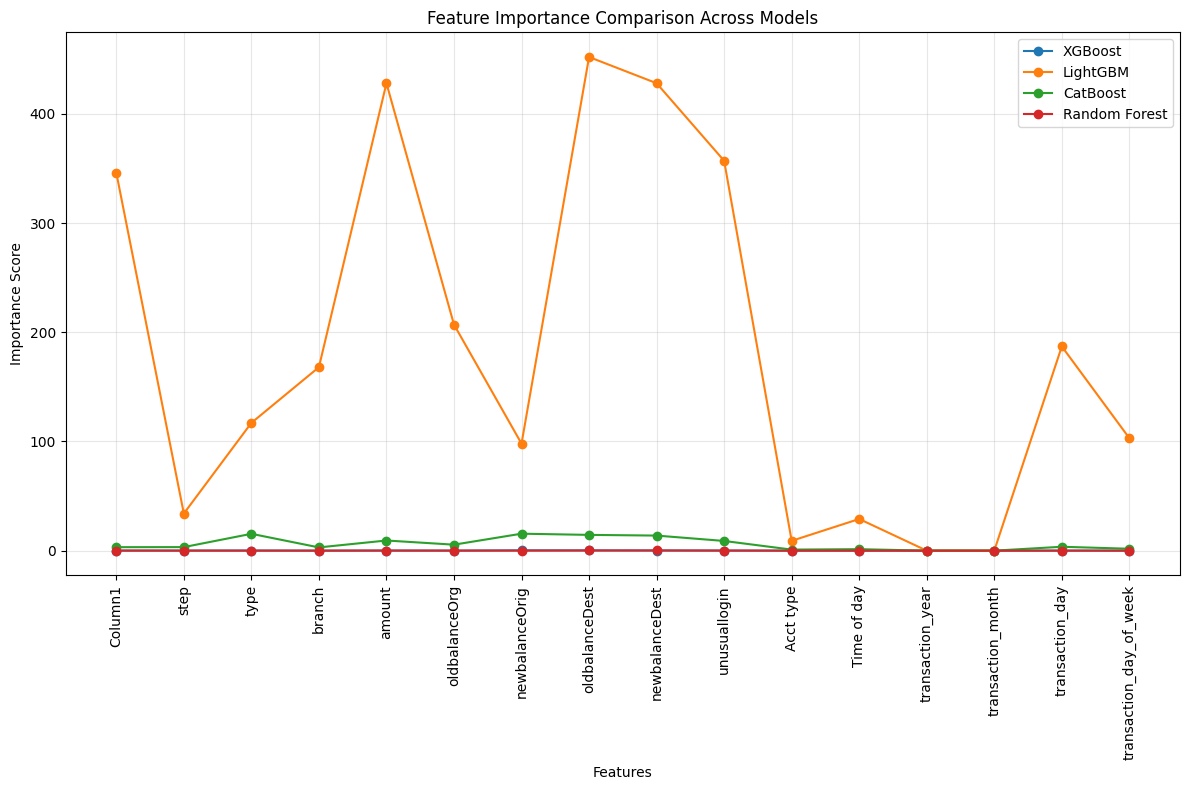

In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Separate target column
target_column = 'isFraud'
y = df[target_column]

# Select only numeric columns, excluding the target column
X = df.select_dtypes(include=[np.number]).drop(target_column, axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train models and retrieve feature importance
feature_importances = {}
models = {
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0),
    'Random Forest': RandomForestClassifier(random_state=42)
}

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    # Get feature importance values and store them in dictionary
    if model_name == 'CatBoost':  # CatBoost feature importance is provided differently
        feature_importances[model_name] = model.get_feature_importance(prettified=False)
    else:
        feature_importances[model_name] = model.feature_importances_

# Convert feature importance data to a DataFrame for easier plotting
feature_importance_df = pd.DataFrame(feature_importances, index=X.columns)

# Plot the feature importances for each model
plt.figure(figsize=(12, 8))
for model_name in feature_importance_df.columns:
    plt.plot(
        feature_importance_df.index,
        feature_importance_df[model_name],
        marker='o',
        label=model_name
    )

plt.title('Feature Importance Comparison Across Models')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=90)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Neural Network

In [35]:
from keras.models import Sequential
from keras.layers import Dense

# Building a simple neural network
nn_model = Sequential()
nn_model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_model.fit(X_train_scaled, y_train, epochs=49, batch_size=32, verbose=1)

# Predictions
y_pred_nn = (nn_model.predict(X_test_scaled) > 0.5).astype("int32")
print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_nn))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/49
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9500 - loss: 0.3217
Epoch 2/49
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9778 - loss: 0.1043
Epoch 3/49
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9798 - loss: 0.0806
Epoch 4/49
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9796 - loss: 0.0690
Epoch 5/49
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9794 - loss: 0.0756
Epoch 6/49
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9810 - loss: 0.0677
Epoch 7/49
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9803 - loss: 0.0678
Epoch 8/49
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9817 - loss: 0.0628
Epoch 9/49
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9807 - loss: 0.0639
Epoch 10/49
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9823 - loss: 0.0598
Epoch 11/49
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9793 - loss: 0.0651
Epoch 12/49
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9867 - lo

Ensemble Method

In [36]:
from sklearn.ensemble import VotingClassifier

voting_model = VotingClassifier(
    estimators=[
        ('logreg', LogisticRegression(solver='liblinear')),
        ('rf', RandomForestClassifier(n_estimators=100)),
        ('svm', SVC(probability=True))
    ],
    voting='soft'  # Use 'hard' for majority voting
)

voting_model.fit(X_train_scaled, y_train)
y_pred_voting = voting_model.predict(X_test_scaled)
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred_voting))


Voting Classifier Accuracy: 0.9845201238390093


In [40]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Define the base models
svm = SVC(kernel='rbf', probability=True, random_state=45)
rf = RandomForestClassifier(n_estimators=100, random_state=41)

# Define the Decision Tree as the final meta-model
dt_meta = DecisionTreeClassifier(max_depth=5, random_state=37)

# Create the stacking classifier
stacking_model = StackingClassifier(
    estimators=[('svm', svm), ('rf', rf)],
    final_estimator=dt_meta,
    cv=5
)

# Fit the stacking model on the training data
stacking_model.fit(X_train, y_train)

# Predict on the test data
y_pred = stacking_model.predict(X_test)

# Evaluate the accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Model Accuracy: {accuracy:.6f}")


Stacking Model Accuracy: 0.992260


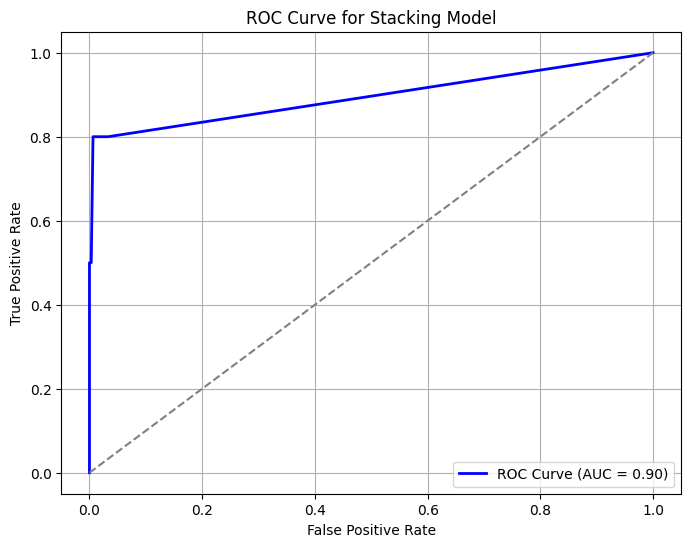

In [41]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay

# Get the predicted probabilities for the positive class
y_pred_proba = stacking_model.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Stacking Model')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [42]:
from xgboost import XGBClassifier

# Define base models
base_models = [
    ('svm', SVC(probability=True, kernel='rbf', random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
]

# Final estimator can still be a RandomForest or any other suitable model
stacking_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression(), cv=5)

# Fit the stacking model on the training data
stacking_model.fit(X_train, y_train)

# Predict on the test data
y_pred = stacking_model.predict(X_test)

# Evaluate the accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Model Accuracy: {accuracy:.6f}")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:30:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:30:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:30:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:30:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:30:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Stacking Model Accuracy: 0.992260


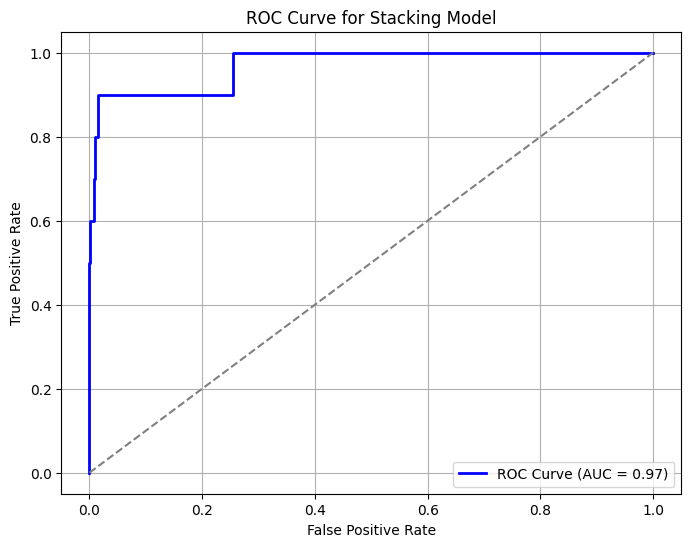

In [43]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay

# Get the predicted probabilities for the positive class
y_pred_proba = stacking_model.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Stacking Model')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

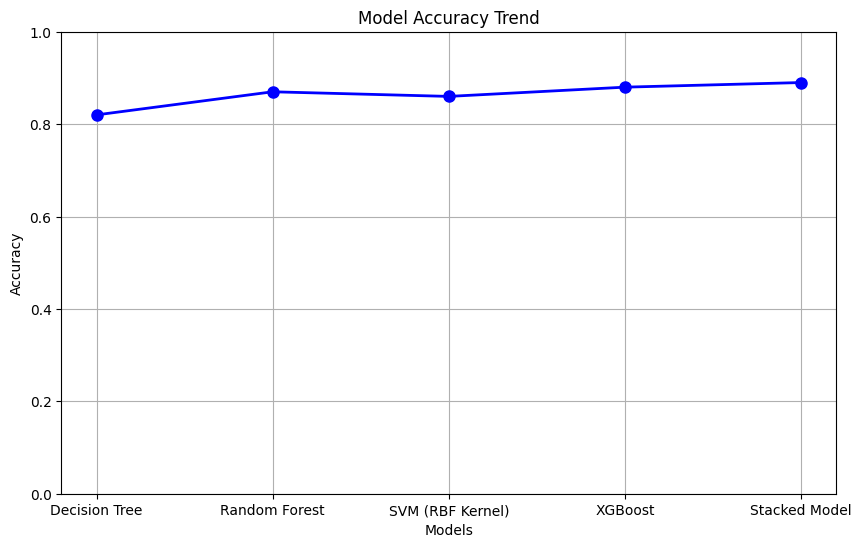

In [45]:
import matplotlib.pyplot as plt

# Example accuracy scores (replace with actual values)
model_names = ['Decision Tree', 'Random Forest', 'SVM (RBF Kernel)', 'XGBoost', 'Stacked Model']
accuracies = [0.82, 0.87, 0.86, 0.88, 0.89]  # Replace these with actual accuracy scores

# Plotting a trend graph
plt.figure(figsize=(10, 6))
plt.plot(model_names, accuracies, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Trend")
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.grid(True)
plt.show()
